## Zadania z przedmiotu zaawansowne narzędzia analityczne

**Studia podyplomowe. Data Science**

---

Po rozwiązaniu zadań proszę o zgranie pliku (`File -> Download as -> notebook(.ipynb)`) wgranie zadań na platformę CEZ.

Czas na rozwiązanie: **50 minut** (łącznie z pobraniem i odesłaniem odpowiedzi)

Każda rozpoczęta minuta opóźnienia w wysłaniu odpowiedzi to -5% z punktacji.  

---
## Zmień nazwę pliku
Zmień nazwę pliku notebooka wpisując własne imię i nazwisko: `Zaliczenie_imie_nazwisko_2024`.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/wojla/data/master/zadanie_dane_I.csv")
df.columns=['seqn', 'exam_id', 'gender', 'age', 'martl_stat', 'rich', 'hh_size', 'cholesterol']
df.head()

,seqn,exam_id,gender,age,martl_stat,rich,hh_size,cholesterol
0,2.0,1,male,77.0,NaN,5.00,1.0,215.0
1,7.0,1,female,59.0,married,NaN,1.0,245.0
2,11.0,1,male,15.0,never married,1.25,5.0,132.0
3,15.0,1,female,38.0,divorced,4.52,2.0,199.0
4,22.0,1,female,13.0,NaN,0.75,5.0,151.0


## Zadanie 1

Zgrupuj dane względem `martl_stat` oraz podaj dane statystyczne dla `cholesterol` na zgrupowanym obiekcie. Dane statystyczne powinny zawierać: liczność, średnią, min, max, odchylenie standardowe, medianę, kwantyle (25 i 75).

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/wojla/data/master/zadanie_dane_I.csv")
df.columns = ['seqn', 'exam_id', 'gender', 'age', 'martl_stat', 'rich', 'hh_size', 'cholesterol']
df.head()

grouped = df.groupby('martl_stat')['cholesterol'].agg(['count', 'mean', 'min', 'max', 'std', 'median', 'quantile'])
def quantiles_25_75(x):
    return pd.Series([x.quantile(0.25), x.quantile(0.75)], index=['25%', '75%'])

quantiles = df.groupby('martl_stat')['cholesterol'].apply(quantiles_25_75).unstack()
result = grouped.join(quantiles)
print(result)

                     count        mean    min    max        std  median  \
martl_stat                                                                
divorced               274  209.627737   83.0  427.0  47.515798   205.5   
don't know               1  244.000000  244.0  244.0        NaN   244.0   
living with partner    177  195.632768  105.0  307.0  42.236020   192.0   
married               1866  204.476420   75.0  401.0  40.406125   201.0   
never married         1637  172.170434   72.0  424.0  37.977984   168.0   
refused                  3  226.666667  194.0  289.0  54.003086   197.0   
separated               97  200.298969   99.0  368.0  45.582381   191.0   
widowed                326  209.125767   99.0  704.0  50.749273   205.5   

                     quantile    25%    75%  
martl_stat                                   
divorced                205.5  176.0  233.0  
don't know              244.0  244.0  244.0  
living with partner     192.0  166.0  223.0  
married            

## Zadanie 2

a) Uzupełnij brakujące wartości dla `martl_stat` najczęściej występującą wartością występującą w tej kolumnie  
b) Uzupełnij brakujące wartości w `cholesterol` wartością będącą wynikiem wyliczenia mediany `cholesterolu` dla osób młodszych niż 60 lat.

In [ ]:
grouped = df.groupby('martl_stat')['cholesterol'].agg(['count', 'mean', 'min', 'max', 'std', 'median', 'quantile'])
def quantiles_25_75(x):
    return pd.Series([x.quantile(0.25), x.quantile(0.75)], index=['25%', '75%'])

quantiles = df.groupby('martl_stat')['cholesterol'].apply(quantiles_25_75).unstack()
result = grouped.join(quantiles)
print(result)

                     count        mean    min    max        std  median  \
martl_stat                                                                
divorced               274  209.627737   83.0  427.0  47.515798   205.5   
don't know               1  244.000000  244.0  244.0        NaN   244.0   
living with partner    177  195.632768  105.0  307.0  42.236020   192.0   
married               1866  204.476420   75.0  401.0  40.406125   201.0   
never married         1637  172.170434   72.0  424.0  37.977984   168.0   
refused                  3  226.666667  194.0  289.0  54.003086   197.0   
separated               97  200.298969   99.0  368.0  45.582381   191.0   
widowed                326  209.125767   99.0  704.0  50.749273   205.5   

                     quantile    25%    75%  
martl_stat                                   
divorced                205.5  176.0  233.0  
don't know              244.0  244.0  244.0  
living with partner     192.0  166.0  223.0  
married            

## Zadanie 3

Stwórz nową kolumnę `hh_size_verb`na podstawie `hh_size` zmieniając `1` na `alone`, `2` na `pair`, `3` na `small_family`, `4` na `family` wszystkie pozostałe wartości z `hh_size` zamień na `big_family`.

Użyj metody `map`.

In [ ]:

hh_size_mapping = {
    1: 'alone',
    2: 'pair',
    3: 'small_family',
    4: 'family'
}

df['hh_size_verb'] = df['hh_size'].map(hh_size_mapping).fillna('big_family')
print(df[['hh_size', 'hh_size_verb']].value_counts())

hh_size  hh_size_verb
4.0      family          1343
2.0      pair            1304
3.0      small_family    1083
5.0      big_family      1023
7.0      big_family       715
1.0      alone            545
6.0      big_family       528
Name: count, dtype: int64


## Zadanie 4

Przedstaw na oddzielnych histogramach wartości z kolumy `rich`. Pierwszy histogram ma wyświetlać rozkład `rich` dla osób z `exam_id==1` drugi dla osób z `exam_id==2`. Ustaw rozmiar wykresów na większy niż domyślny. Dodatkowo zwiększ ilość wyświetlanych słupków do 20 (domyślnie histogramy wyświetlają 10 słupków). Nadaj tytuły wykresom.

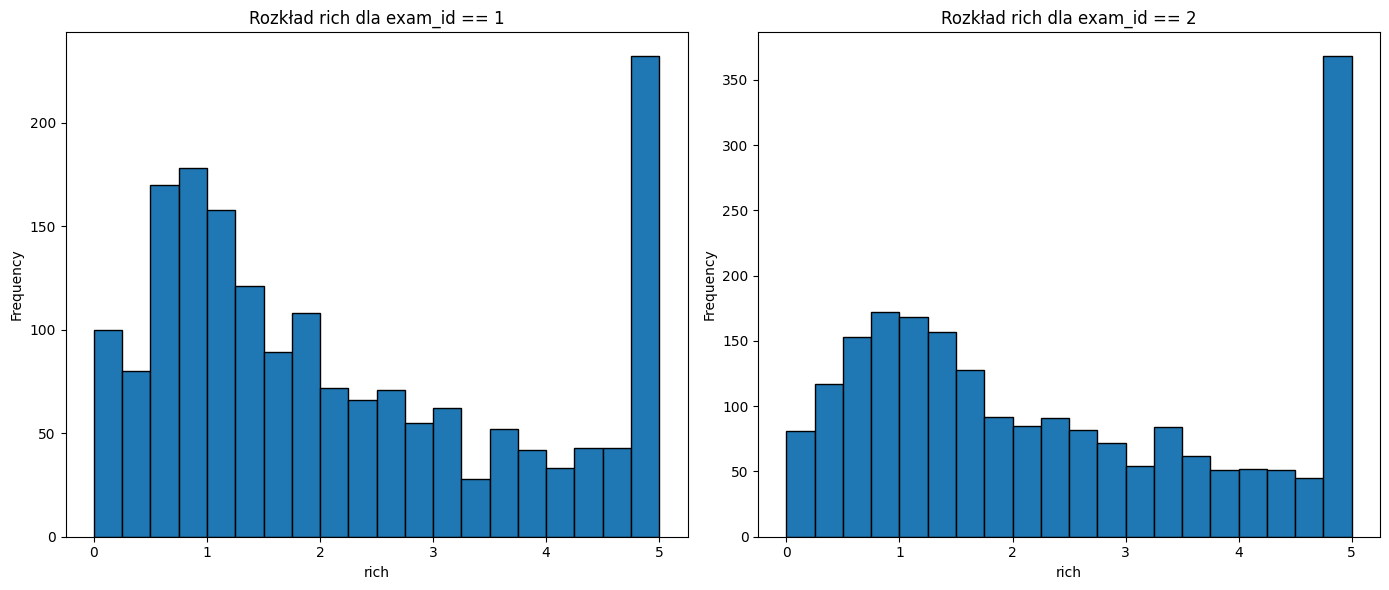

In [ ]:
rich_exam1 = df[df['exam_id'] == 1]['rich']
rich_exam2 = df[df['exam_id'] == 2]['rich']
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(rich_exam1, bins=20, edgecolor='black')
plt.title('Rozkład rich dla exam_id == 1')
plt.xlabel('rich')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(rich_exam2, bins=20, edgecolor='black')
plt.title('Rozkład rich dla exam_id == 2')
plt.xlabel('rich')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

## Zadanie 5

Wyświetl tzw. scatter plot dla zależności `age` i `cholesterol`.
Podpisz odpowiednio osie x i y.
Nadaj tytuł wykresowi.


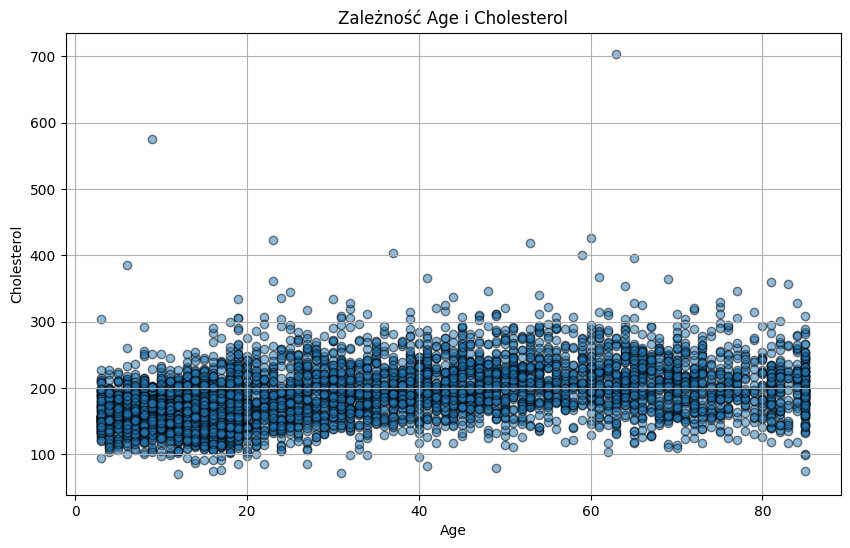

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['cholesterol'], alpha=0.5, edgecolor='k')
plt.title('Zależność Age i Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.grid(True)
plt.show()

## Zadanie 6

Załaduj plik `https://raw.githubusercontent.com/wojla/data/master/zadanie_dane_II.csv` do zmiennej `bmi_df`.

Na podstawie kolumny `seqn` połącz oba datasety (`bmi_df` oraz `df`). Wynikowy dataset zapisz do zmiennej `joined_df`.
Zbiór `joined_df` powinen zawierać tylko te identyfikatory, które występują tylko w `df`.
Wyświetl 10 pierwszych wierszy z `joined_df`.    

Napisz w komentarzu jaki typ łączenia został zastosowany (`left`, `right`, `inner` czy `outer`) i jakie nowe kolumny się pojawiły w `joined_df` względem `df`.


Do połączenia tabel wykorzystaj metodę `join` lub `merge`.

In [ ]:

import pandas as pd
bmi_df = pd.read_csv("https://raw.githubusercontent.com/wojla/data/master/zadanie_dane_II.csv")
joined_df = df.merge(bmi_df, on='seqn', how='inner')

print(joined_df.head(10))

   seqn  exam_id  gender   age     martl_stat  rich  hh_size  cholesterol  \
0   2.0        1    male  77.0            NaN  5.00      1.0        215.0   
1   7.0        1  female  59.0        married   NaN      1.0        245.0   
2  11.0        1    male  15.0  never married  1.25      5.0        132.0   
3  15.0        1  female  38.0       divorced  4.52      2.0        199.0   
4  22.0        1  female  13.0            NaN  0.75      5.0        151.0   
5  26.0        1  female  14.0  never married  2.51      7.0        145.0   
6  30.0        1  female   7.0            NaN   NaN      4.0        184.0   
7  34.0        1  female  38.0  never married  0.92      7.0        195.0   
8  42.0        1  female  18.0  never married   NaN      7.0        187.0   
9  46.0        1  female  85.0        widowed  1.20      1.0        187.0   

  hh_size_verb  Unnamed: 0  weight  height  
0        alone           1    75.4   174.0  
1        alone           6    78.0   162.9  
2   big_family   